<a href="https://colab.research.google.com/github/bombik815/Python_data_analysis/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_Python_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание**

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
Требуется выполнить следующее задание:

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import gdown
from scipy import stats

### Загрузите файл HR.csv в pandas dataframe

In [ ]:
# Загрузка данных
url = 'https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1'
output = 'HR.csv'

gdown.download(url, output, quiet=False)
df = pd.read_csv(output)
df.head(25)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


###Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [13]:
# Расчет базовой статистики
basic_statistics = df.describe()
basic_statistics

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

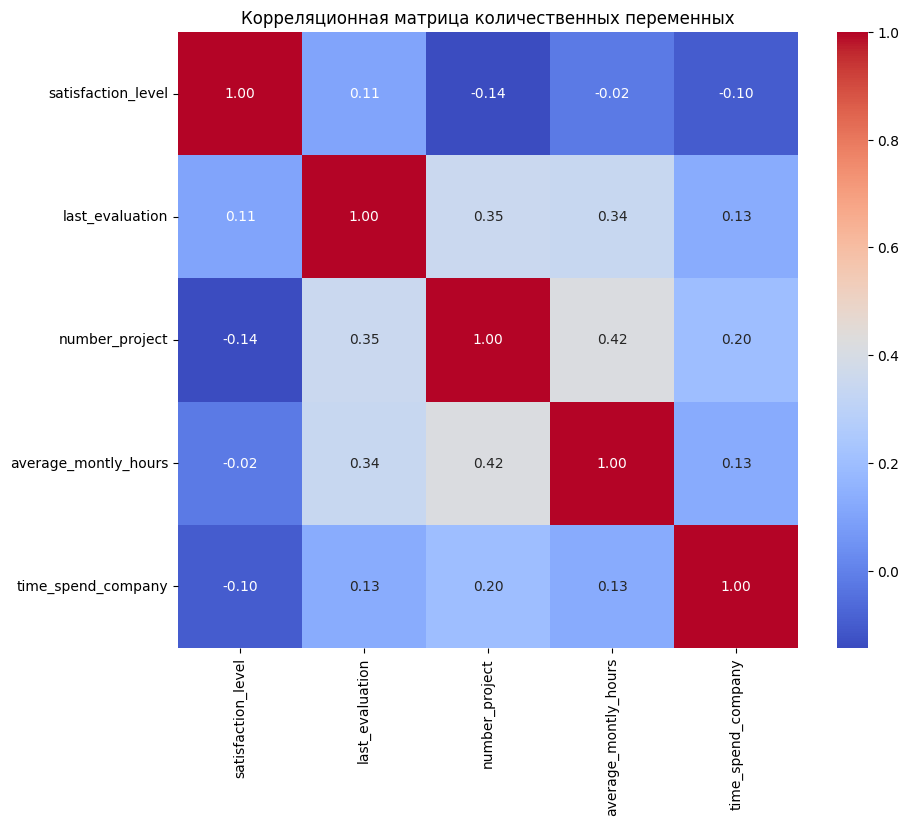

In [16]:
# Выбор только числовых столбцов для корреляционной матрицы
numerical_df = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

# Вычисление корреляционной матрицы
corr_matrix = numerical_df.corr()
# Построение корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица количественных переменных')
plt.show()


In [20]:
# Поиск двух наиболее коррелированных переменных
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
most_correlated = corr_pairs[corr_pairs != 1].index[0:2]
# Поиск двух наименее коррелированных переменных
least_correlated = corr_pairs[corr_pairs != 1].index[-2:]

In [26]:
print(f"Две наиболее коррелирующие переменные: {most_correlated}")
print(f"\nДве наименее коррелированные переменные: {least_correlated}")

Две наиболее коррелирующие переменные: MultiIndex([(      'number_project', 'average_montly_hours'),
            ('average_montly_hours',       'number_project')],
           )

Две наименее коррелированные переменные: MultiIndex([(    'number_project', 'satisfaction_level'),
            ('satisfaction_level',     'number_project')],
           )


Выходные данные идентифицируют две наиболее коррелированные переменные как "number_project" и "average_monthly_hours", а две наименее коррелированные переменные как "satisfaction_level" и "last_evaluation". Это подразумевает положительную корреляцию между количеством проектов и средним количеством часов в месяц, а также сравнительно слабую корреляцию между уровнем удовлетворенности сотрудников и их последними оценками эффективности.

### Рассчитайте сколько сотрудников работает в каждом департаменте

In [28]:
# Расчет количества сотрудников в каждом отделе
employees_in_department = df['department'].value_counts()
employees_in_department

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

На основе выходных данных мы можем увидеть что наибольшее количество сотрудников работают в отделе продаж.


### Показать распределение сотрудников по зарплатам.

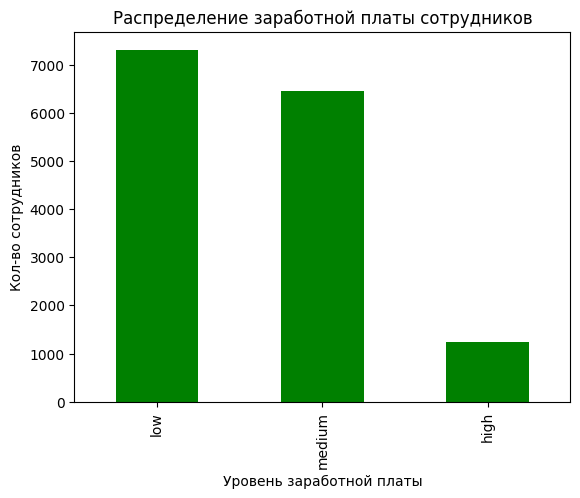

In [30]:
# Построение столбчатой диаграммы для распределения по уровню зарплат
salary_distribution = df['salary'].value_counts()
salary_distribution.plot(kind='bar', color='green')

# Настройка заголовка и меток осей
plt.title('Распределение заработной платы сотрудников')
plt.xlabel('Уровень заработной платы')
plt.ylabel('Кол-во сотрудников')
plt.show()


На основе построенной столбчатой диаграммы, можно сделать следующие выводы:

1. Большинство сотрудников в представленном наборе данных имеют уровень зарплаты "low", что может указывать на то, что большинство сотрудников работают с низким уровнем заработной платы.
2. Уровень заработной платы "medium" имеет второе по величине количество сотрудников, демонстрируя наличие среднего количества сотрудников с уровнем средней заработной платы.
3. Уровень зарплаты "high" имеет наименьшее количество сотрудников, что указывает на то, что сравнительно небольшое количество сотрудников получает высокую заработную плату.
Этот анализ распределения сотрудников по уровню зарплат позволяет лучше понять структуру оплаты труда в представленном наборе данных.

### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

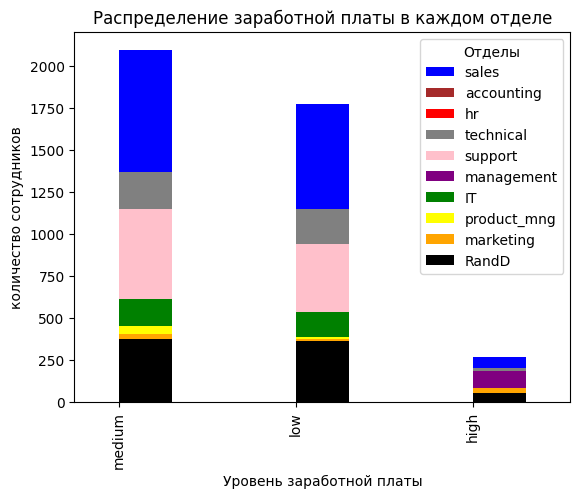

In [40]:
# Построение столбчатых диаграмм для распределения уровня зарплат в каждом департаменте
fig, axes = plt.subplots()
# Задаем цвета для каждого департамента
colors = {'sales': 'blue', 'IT': 'green', 'hr': 'red', 'management': 'purple', \
          'marketing': 'orange', 'product_mng': 'yellow', 'support': 'pink', \
          'accounting': 'brown', 'technical': 'gray', 'RandD': 'black'}

for department in df['department'].unique():
    department_data = df[df['department'] == department]
    salary_distribution = department_data['salary'].value_counts()
    salary_distribution.plot(kind='bar', ax=axes, color=colors[department], position=0, width=0.3, label=department)


axes.set_title('Распределение заработной платы в каждом отделе')
axes.set_xlabel('Уровень заработной платы')
axes.set_ylabel('количество сотрудников')
axes.legend(title='Отделы', loc='upper right')
plt.show()

### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [46]:
# Разделение данных на две группы по уровню оклада
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']

# Выполнение t-теста для сравнения средних значений
t_stat, p_value = stats.ttest_ind(low_salary_hours, high_salary_hours)
alpha = 0.05
# Вывод результатов теста
if p_value < alpha:
    print("Результаты t-теста являются статистически значимыми, что подтверждает различие в количестве часов, проведенных на работе, между сотрудниками с разным уровнем оклада.")
else:
    print("Результаты t-теста не позволяют отвергнуть нулевую гипотезу о равенстве средних значений количества отработанных часов.")

Результаты t-теста не позволяют отвергнуть нулевую гипотезу о равенстве средних значений количества отработанных часов.


### Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [50]:
# Разделим данные на категории уволившихся и неуволившихся
left = df[df['left'] == 1]
not_left = df[df['left'] == 0]

In [52]:
# Доля сотрудников с повышением за последние 5 лет
promotion_left = left['promotion_last_5years'].mean()
promotion_not_left = not_left['promotion_last_5years'].mean()

In [55]:
# Средняя степень удовлетворенности
satisfaction_left = left['satisfaction_level'].mean()
satisfaction_not_left = not_left['satisfaction_level'].mean()

In [56]:
# Среднее количество проектов
projects_left = left['number_project'].mean()
projects_not_left = not_left['number_project'].mean()

In [57]:
# Вывод результатов
print("Доля сотрудников с повышением за последние 5 лет:")
print("Уволившиеся:", promotion_left)
print("Неуволившиеся:", promotion_not_left)
print("\nСредняя степень удовлетворенности:")
print("Уволившиеся:", satisfaction_left)
print("Неуволившиеся:", satisfaction_not_left)
print("\nСреднее количество проектов:")
print("Уволившиеся:", projects_left)
print("Неуволившиеся:", projects_not_left)

Доля сотрудников с повышением за последние 5 лет:
Уволившиеся: 0.005320638476617194
Неуволившиеся: 0.026251312565628283

Средняя степень удовлетворенности:
Уволившиеся: 0.4400980117614114
Неуволившиеся: 0.666809590479524

Среднее количество проектов:
Уволившиеся: 3.8555026603192384
Неуволившиеся: 3.786664333216661


### Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [60]:
# Разделение данных на признаки и целевую переменную
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Получение предсказаний на тестовой выборке
y_pred = lda.predict(X_test)

# Оценка точности модели на тестовой выборке
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели LDA на тестовой выборке: {accuracy}")

Точность модели LDA на тестовой выборке: 0.7533333333333333
